In [90]:
import pandas as pd
import seaborn as sns

In [91]:
df = pd.read_csv("updated_data.csv")

In [92]:
df.describe()

,Months_since_Release,A_units,A_values,Avg_Price_unit
count,189.000000,189.000000,183.000000,183.000000
mean,2.000000,340.211640,21191.867654,53.646005
std,0.818665,701.648483,47446.270176,14.499328
min,1.000000,100.000000,2229.526048,22.295260
25%,1.000000,100.000000,4634.319270,43.240320
50%,2.000000,100.000000,6797.287060,52.424140
75%,3.000000,300.000000,16063.656605,65.149011
max,3.000000,7900.000000,502198.008100,79.625471


In [103]:
from scipy.stats import skew, kurtosis

# Enhanced summary statistics
# First, select only the relevant columns
selected_columns = df[['A_units', 'A_values', 'Avg_Price_unit']]

# Transpose for better readability
summary_stats = selected_columns.describe().T

# Calculate skewness and kurtosis for the selected columns
summary_stats['skew'] = selected_columns.apply(skew)
summary_stats['kurtosis'] = selected_columns.apply(kurtosis)

# Print the enhanced summary statistics
print(summary_stats)


                count          mean           std          min         25%   
A_units         189.0    340.211640    701.648483   100.000000   100.00000  \
A_values        183.0  21191.867654  47446.270176  2229.526048  4634.31927   
Avg_Price_unit  183.0     53.646005     14.499328    22.295260    43.24032   

                       50%           75%            max      skew   kurtosis  
A_units          100.00000    300.000000    7900.000000  7.422181  71.420237  
A_values        6797.28706  16063.656605  502198.008100       NaN        NaN  
Avg_Price_unit    52.42414     65.149011      79.625471       NaN        NaN  


In [93]:
df.columns

Index(['Months_since_Release', 'Format', 'A_units', 'A_values',
       'Platform_Label', 'Territory_label', 'Avg_Price_unit'],
      dtype='object')

In [94]:
df['Avg_Price_unit'] = df["A_values"] / df["A_units"]

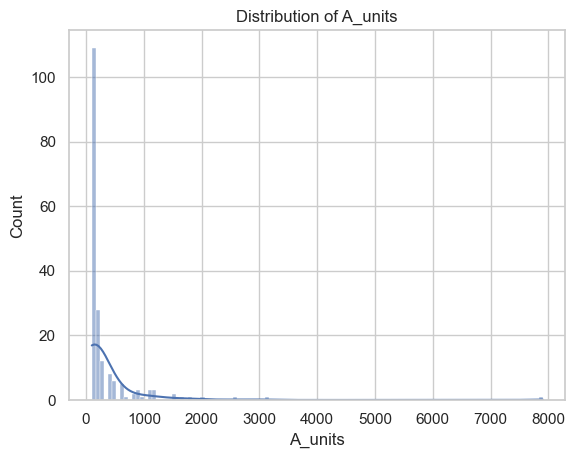

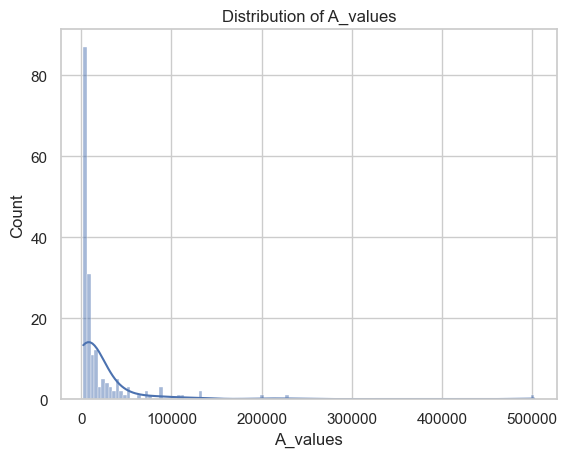

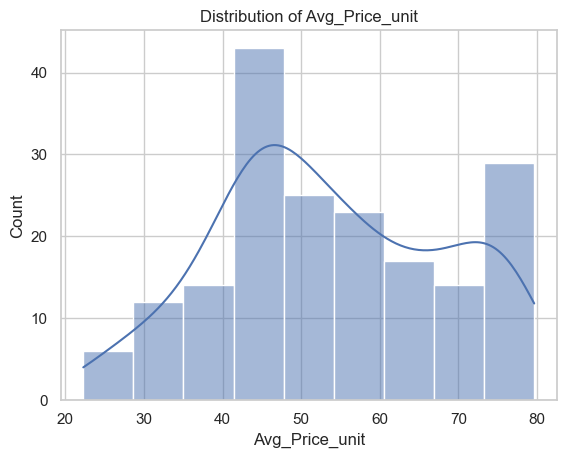

In [95]:
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

sns.histplot(data=df, x='A_units', kde=True)
plt.title('Distribution of A_units')
plt.show()

sns.histplot(data=df, x='A_values', kde=True)
plt.title('Distribution of A_values')
plt.show()

sns.histplot(data=df, x='Avg_Price_unit', kde=True)
plt.title('Distribution of Avg_Price_unit')
plt.show()


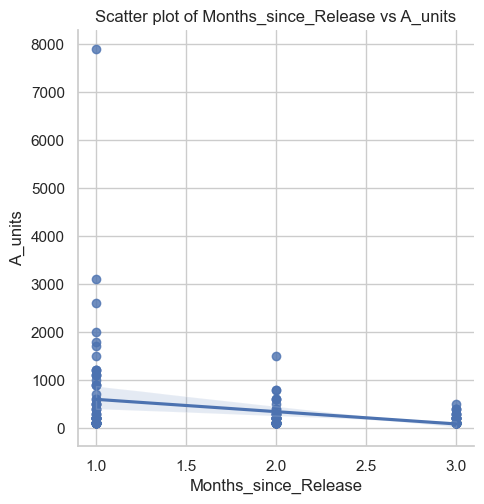

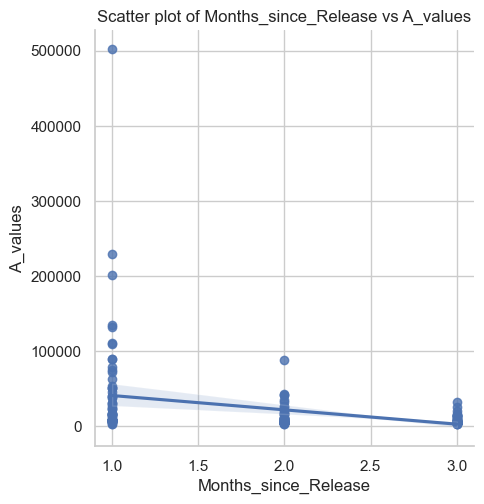

In [96]:
sns.lmplot(x='Months_since_Release', y='A_units', data=df)
plt.title('Scatter plot of Months_since_Release vs A_units')
plt.show()

sns.lmplot(x='Months_since_Release', y='A_values', data=df)
plt.title('Scatter plot of Months_since_Release vs A_values')
plt.show()

In [97]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [98]:
grouped_data = df.groupby(['Months_since_Release', 'Platform_Label', 'Territory_label']).agg({
    'A_units': ['sum', 'mean', 'std'],
    'A_values': ['sum', 'mean', 'std']
}).reset_index()

print(grouped_data)

    Months_since_Release Platform_Label           Territory_label A_units   
                                                                      sum   
0                      1             PC                      BENE     500  \
1                      1             PC            CENTRAL EUROPE     100   
2                      1             PC            EASTERN EUROPE     900   
3                      1             PC                    FRANCE     700   
4                      1             PC                       GSA    1100   
..                   ...            ...                       ...     ...   
124                    3       XBOX ONE                   NORDICS     200   
125                    3       XBOX ONE                   OCEANIA     100   
126                    3       XBOX ONE                    POLAND     200   
127                    3       XBOX ONE           SOUTHERN EUROPE     100   
128                    3       XBOX ONE  UNITED KINGDOM & IRELAND     200   

/var/folders/r3/_3_gt7t977j5g2pn4x4v6x780000gp/T/ipykernel_31774/2740208120.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Months_since_Release', y='A_units', estimator='sum', ci=None, marker='o')


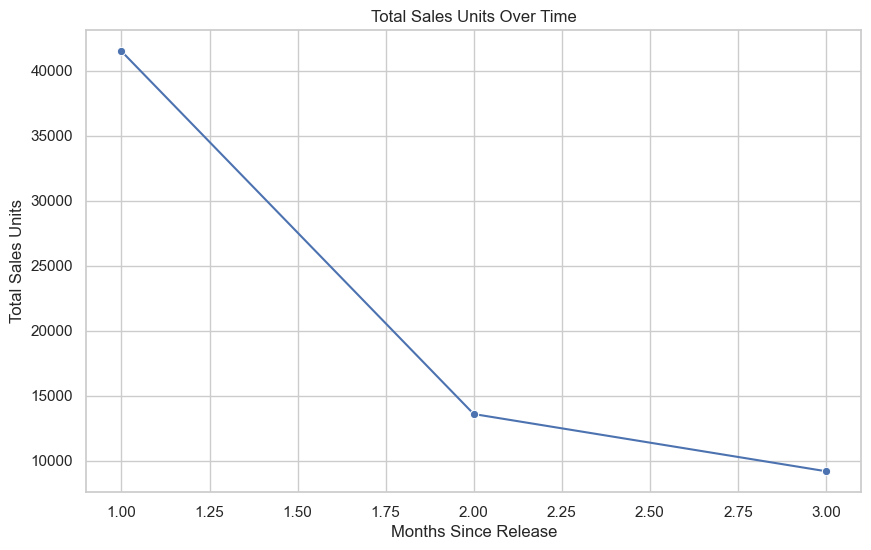

/var/folders/r3/_3_gt7t977j5g2pn4x4v6x780000gp/T/ipykernel_31774/2740208120.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Months_since_Release', y='A_values', estimator='sum', ci=None, marker='o')


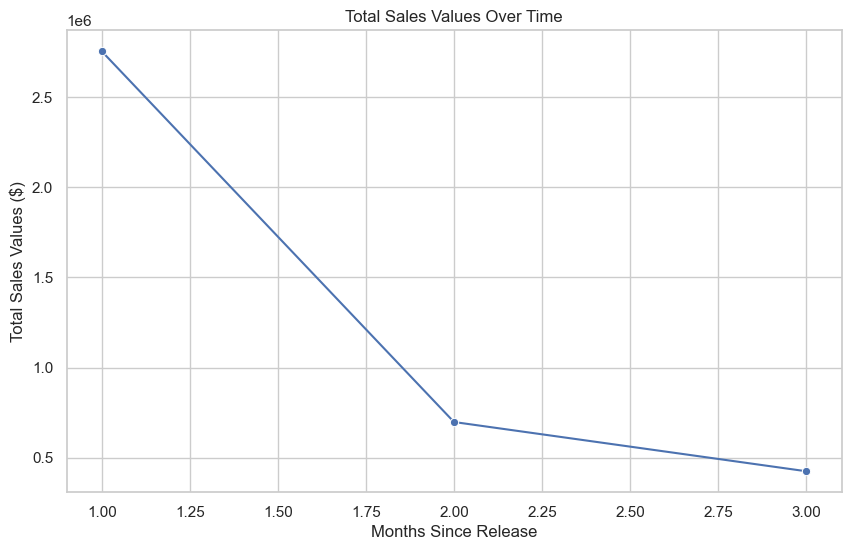

In [99]:
sns.set_style("whitegrid")

# Sales Units Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Months_since_Release', y='A_units', estimator='sum', ci=None, marker='o')
plt.title('Total Sales Units Over Time')
plt.xlabel('Months Since Release')
plt.ylabel('Total Sales Units')
plt.show()

# Sales Values Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Months_since_Release', y='A_values', estimator='sum', ci=None, marker='o')
plt.title('Total Sales Values Over Time')
plt.xlabel('Months Since Release')
plt.ylabel('Total Sales Values ($)')
plt.show()

/var/folders/r3/_3_gt7t977j5g2pn4x4v6x780000gp/T/ipykernel_31774/2908608893.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Platform_Label', y='A_units', estimator=sum, ci=None)


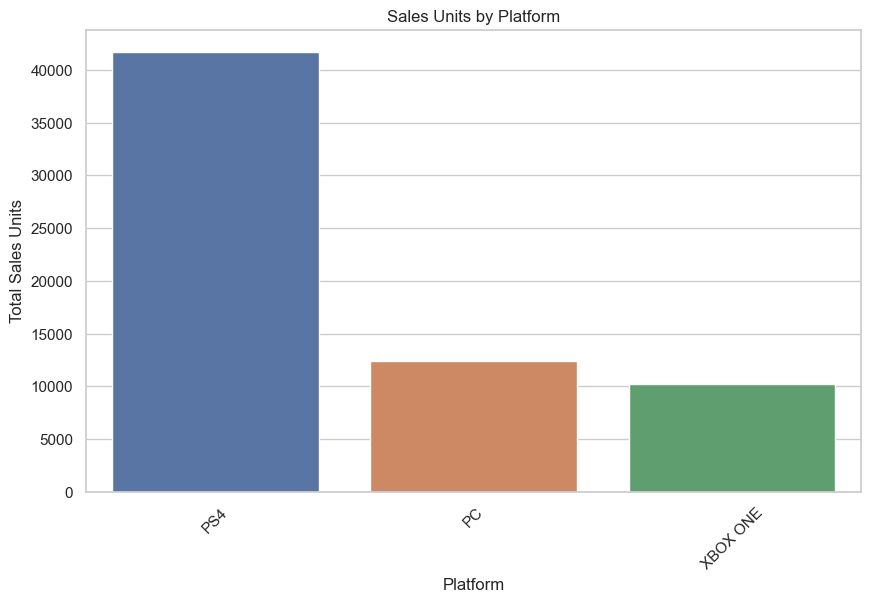

/var/folders/r3/_3_gt7t977j5g2pn4x4v6x780000gp/T/ipykernel_31774/2908608893.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ordered_data, x='Territory_label', y='A_units', ci=None)


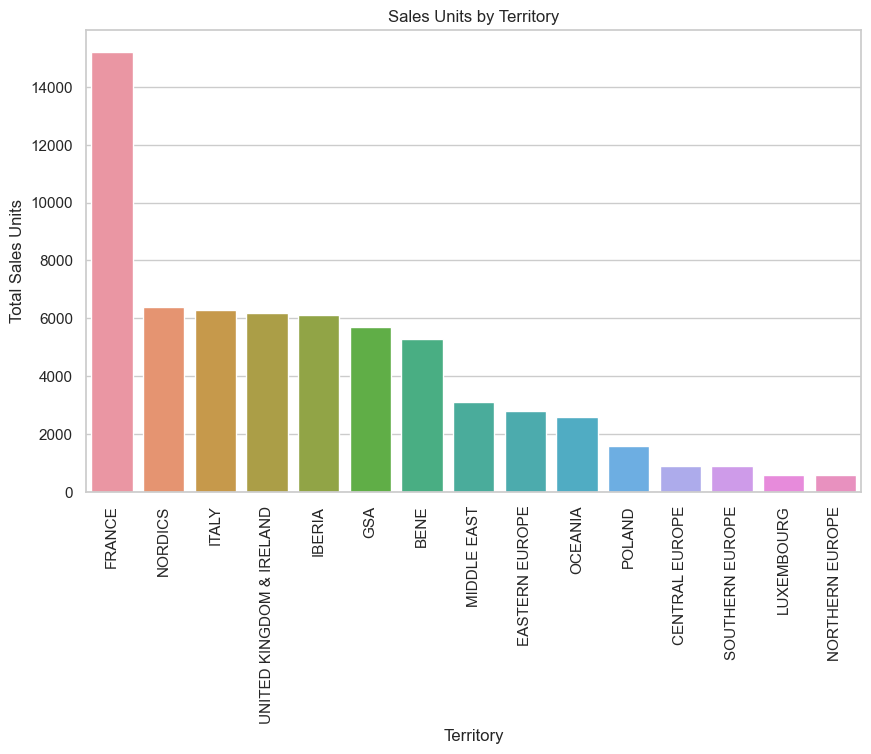

In [108]:
# Sales Units by Platform
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Platform_Label', y='A_units', estimator=sum, ci=None)
plt.title('Sales Units by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales Units')
plt.xticks(rotation=45)
plt.show()

ordered_data = df.groupby('Territory_label')['A_units'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ordered_data, x='Territory_label', y='A_units', ci=None)
plt.title('Sales Units by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales Units')
plt.xticks(rotation=90)
plt.show()

/var/folders/r3/_3_gt7t977j5g2pn4x4v6x780000gp/T/ipykernel_31774/189241643.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Format', y='A_units', estimator=sum, ci=None)


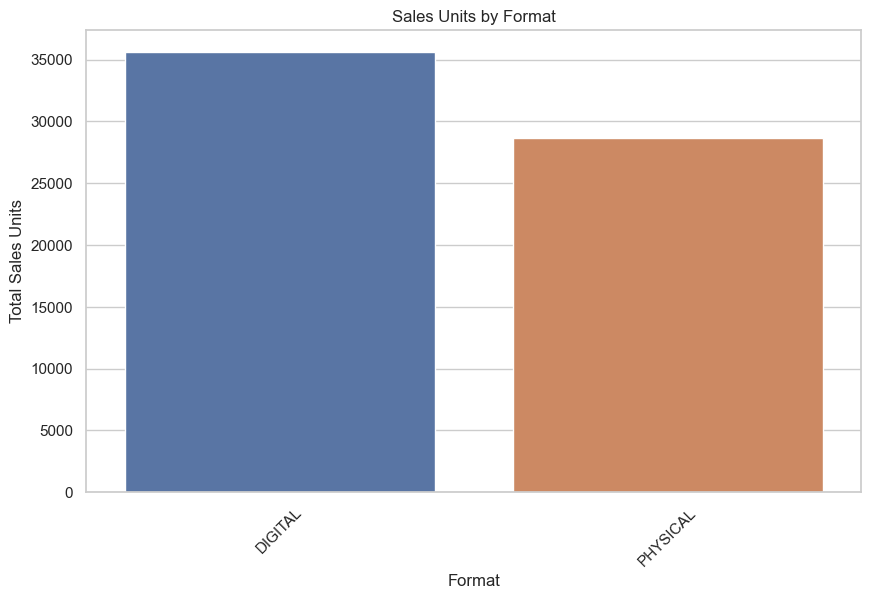

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Format', y='A_units', estimator=sum, ci=None)
plt.title('Sales Units by Format')
plt.xlabel('Format')
plt.ylabel('Total Sales Units')
plt.xticks(rotation=45)
plt.show()

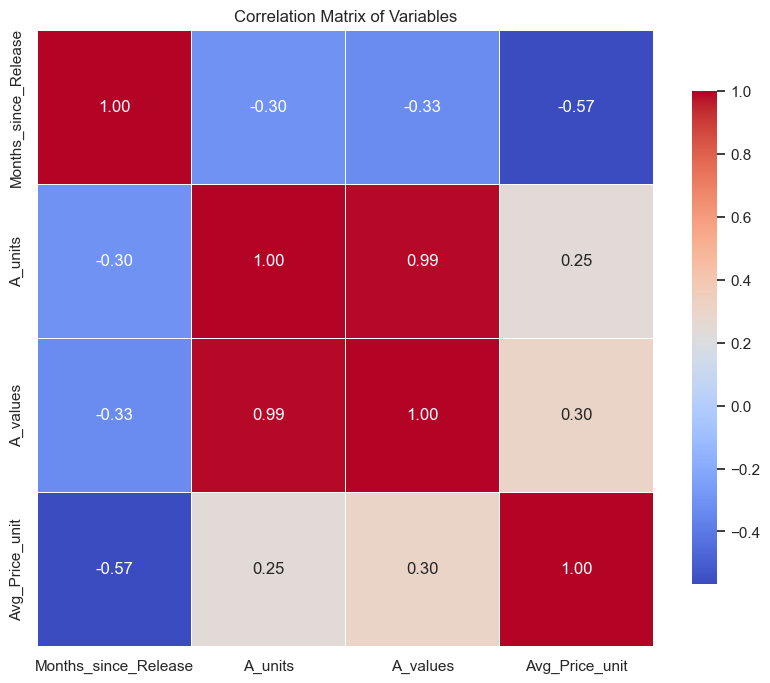

In [105]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Adding title
plt.title('Correlation Matrix of Variables')

# Show plot
plt.show()